In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset principal
df_consumo_agregado = pd.read_parquet('consumo_agregado.parquet')
print("\n--- 1. Consumo Agregado ---")
df_consumo_agregado.info()
print("\nPrimeras filas del Consumo Agregado:")
df_consumo_agregado.head()


--- 1. Consumo Agregado ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963419 entries, 0 to 963418
Data columns (total 7 columns):
 #   Column                                                                             Non-Null Count   Dtype 
---  ------                                                                             --------------   ----- 
 0   Secció censal/Sección censal/Census section                                        962324 non-null  object
 1   Districte/Distrito/District                                                        962324 non-null  object
 2   Municipi/Municipio/Municipality                                                    963419 non-null  object
 3   Data/Fecha/Date                                                                    963419 non-null  object
 4   Ús/Uso/Use                                                                         963419 non-null  object
 5   Nombre de comptadors/Número de contadores/Number of meters              

,Secció censal/Sección censal/Census section,Districte/Distrito/District,Municipi/Municipio/Municipality,Data/Fecha/Date,Ús/Uso/Use,Nombre de comptadors/Número de contadores/Number of meters,Consum acumulat (L/dia)/Consumo acumulado (L/día)/Accumulated consumption (L/day)
0,801901001,1,BARCELONA,2023-01-01,Comercial/Comercial/Commercial,64,14258
1,801901001,1,BARCELONA,2023-01-01,Domèstic/Doméstico/Domestic,395,11089
2,801901001,1,BARCELONA,2023-01-01,Industrial/Industrial/Industrial,20,490360
3,801901001,1,BARCELONA,2023-01-02,Comercial/Comercial/Commercial,64,6780
4,801901001,1,BARCELONA,2023-01-02,Domèstic/Doméstico/Domestic,395,11571


In [7]:
# Mostrar Distritos
print("\n--- Distritos Unicos en df_barcelona ---")
distritos_unicos = df_consumo_agregado['Districte/Distrito/District'].unique().tolist()
distritos_unicos



--- Distritos Unicos en df_barcelona ---


['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '03', '06', '>', None]

In [10]:
# Mostrar Municipios
print("\n --- Municipios Unicos en df_barcelona ---")
municipios_unicos = df_consumo_agregado['Municipi/Municipio/Municipality'].unique().tolist()
municipios_unicos


 --- Municipios Unicos en df_barcelona ---


['BARCELONA']

In [11]:
# Cargar el dataset de fuites
df_fugas = pd.read_parquet('/content/Fuites')
print("\n--- 2. Fugas ---")
df_fugas.info()
print("\nPrimeras filas de Fugas:")
df_fugas.head()


--- 2. Fugas ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121834 entries, 0 to 121833
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   POLIZA_SUMINISTRO    121834 non-null  object        
 1   NUMEROSERIECONTADOR  121834 non-null  object        
 2   CONSUMO_REAL         106983 non-null  float64       
 3   FECHA_HORA           121834 non-null  datetime64[us]
 4   DATA_INI_FACT        121834 non-null  object        
 5   DATA_FIN_FACT        121834 non-null  object        
 6   CREATED_MENSAJE      99400 non-null   datetime64[us]
 7   CODIGO_MENSAJE       99400 non-null   object        
 8   TIPO_MENSAJE         99400 non-null   object        
dtypes: datetime64[us](2), float64(1), object(6)
memory usage: 8.4+ MB

Primeras filas de Fugas:


,POLIZA_SUMINISTRO,NUMEROSERIECONTADOR,CONSUMO_REAL,FECHA_HORA,DATA_INI_FACT,DATA_FIN_FACT,CREATED_MENSAJE,CODIGO_MENSAJE,TIPO_MENSAJE
0,U2DVJQEKG3Y56QXB,62TNP5RI2GUII6WB,9.0,2024-01-01 00:29:14,2024-01-24,2024-03-26,NaT,None,None
1,U2DVJQEKG3Y56QXB,62TNP5RI2GUII6WB,7.0,2024-01-01 01:29:14,2024-01-24,2024-03-26,NaT,None,None
2,U2DVJQEKG3Y56QXB,62TNP5RI2GUII6WB,10.0,2024-01-01 02:29:14,2024-01-24,2024-03-26,NaT,None,None
3,U2DVJQEKG3Y56QXB,62TNP5RI2GUII6WB,7.0,2024-01-01 03:29:14,2024-01-24,2024-03-26,NaT,None,None
4,U2DVJQEKG3Y56QXB,62TNP5RI2GUII6WB,7.0,2024-01-01 04:29:14,2024-01-24,2024-03-26,NaT,None,None


In [12]:
# Renombrado de df.consumo_agregado
df_barcelona = df_consumo_agregado.rename(columns={
    'Secció censal/Sección censal/Census section': 'SECCION_CENSAL',
    'Districte/Distrito/District': 'DISTRITO',
    'Municipi/Municipio/Municipality': 'MUNICIPIO',
    'Data/Fecha/Date': 'FECHA',
    'Ús/Uso/Use': 'USO',
    'Nombre de comptadors/Número de contadores/Number of meters': 'NUM_CONTADORES',
    'Consum acumulat (L/dia)/Consumo acumulado (L/día)/Accumulated consumption (L/day)': 'CONSUMO_L_DIA'
})

# Conversión de tipos
df_barcelona['FECHA'] = pd.to_datetime(df_barcelona['FECHA'], format='%Y-%m-%d')

# --- B. LIMPIEZA DE CATEGORÍAS Y GEOGRAFÍA ---
# Limpieza de la columna USO (ej: 'Commercial/Comercial/Commercial' -> 'Commercial')
df_barcelona['USO'] = df_barcelona['USO'].astype(str).str.split('/').str[-1].str.strip()

# Limpieza de DISTRITO
# 1. Convertir a string y quitar espacios
df_barcelona['DISTRITO'] = df_barcelona['DISTRITO'].astype(str).str.strip()

# 2. Normalizar '03' → '3' y '06' → '6' Hemos visto que es un error en los datos pues sólo hay 10 distritos en Barcelona
df_barcelona['DISTRITO'] = df_barcelona['DISTRITO'].replace({'03': '3', '06': '6'})

# 3. Eliminar valores anómalos (>, None, nan, nulos)
df_barcelona = df_barcelona[
    ~df_barcelona['DISTRITO'].isin(['>', 'None', 'nan']) &
    df_barcelona['DISTRITO'].notna()
].copy()

# Eliminar duplicados
df_barcelona = df_barcelona.drop_duplicates().copy()

print("1. Limpieza de Consumo Agregado completada. DataFrame: df_barcelona")
print(f"   Registros finales: {len(df_barcelona):,}")
print("   Columnas clave limpias: FECHA, USO, DISTRITO, CONSUMO_L_DIA")

1. Limpieza de Consumo Agregado completada. DataFrame: df_barcelona
   Registros finales: 961,229
   Columnas clave limpias: FECHA, USO, DISTRITO, CONSUMO_L_DIA


In [14]:
# Renombrado de df_fugas
df_fugas = df_fugas.rename(columns={
    'POLIZA_SUMINISTRO': 'POLIZA',
    'NUMEROSERIECONTADOR': 'NUM_SERIE_CONTADOR',
    'CONSUMO_REAL': 'CONSUMO_REAL',
    'FECHA_HORA': 'FECHA_HORA',
    'DATA_INI_FACT': 'FECHA_INICIO',
    'DATA_FIN_FACT': 'FECHA_FIN',
    'CREATED_MENSAJE': 'FECHA_CREACION_MENSAJE',
    'CODIGO_MENSAJE': 'CODIGO_MENSAJE',
    'TIPO_MENSAJE': 'TIPO_MENSAJE'
})

# Conversión de tipos
df_fugas['FECHA_INICIO'] = pd.to_datetime(df_fugas['FECHA_INICIO'], format='%Y-%m-%d')
df_fugas['FECHA_FIN'] = pd.to_datetime(df_fugas['FECHA_FIN'], format='%Y-%m-%d')

# Eliminar duplicados
df_fugas = df_fugas.drop_duplicates()

print("\n✅ 2. Limpieza de Fugas completada. DataFrame: df_fugas")
print(f"   Registros finales: {len(df_fugas):,}")
print(f"   Registros con mensaje: {df_fugas['CODIGO_MENSAJE'].notna().sum():,} ({df_fugas['CODIGO_MENSAJE'].notna().sum()/len(df_fugas)*100:.1f}%)")
print(f"   Tipos de mensaje únicos: {df_fugas['TIPO_MENSAJE'].nunique()}")


✅ 2. Limpieza de Fugas completada. DataFrame: df_fugas
   Registros finales: 121,834
   Registros con mensaje: 99,400 (81.6%)
   Tipos de mensaje únicos: 2



FASE 1.A: ANÁLISIS DE CONSUMO POR TIPO DE USO

 RESUMEN POR TIPO DE USO:
       USO  CONSUMO_L_DIA  NUM_CONTADORES  CONSUMO_PROMEDIO_CONTADOR  PORCENTAJE_CONSUMO
Industrial    11913037901         1231840                9670.929586           52.912189
  Domestic     7559927603       217270208                  34.795049           33.577692
Commercial     3041766989        22492787                 135.232997           13.510118


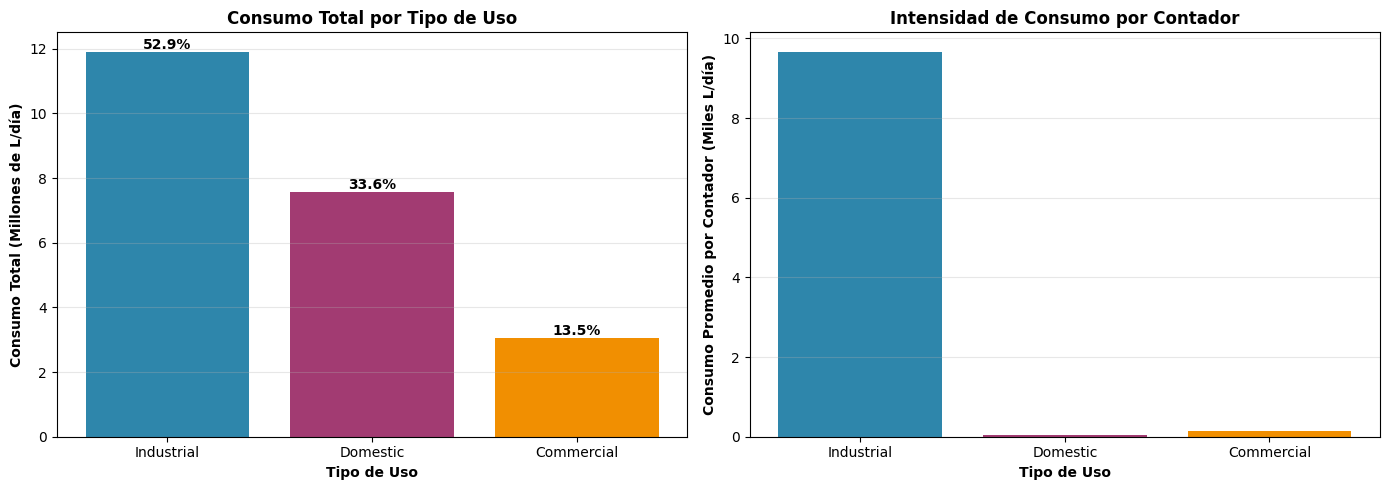


 OBSERVACIONES INICIALES:
   • El tipo de uso dominante es: Industrial
   • Representa el 52.9% del consumo total
   • Intensidad: 9.7k L/día por contador


In [15]:
# ============================================
# FASE 1.A: ANÁLISIS POR USO
# ============================================

print("\n" + "="*60)
print("FASE 1.A: ANÁLISIS DE CONSUMO POR TIPO DE USO")
print("="*60)

# Agrupar por USO
analisis_uso = df_barcelona.groupby('USO').agg({
    'CONSUMO_L_DIA': 'sum',
    'NUM_CONTADORES': 'sum'
}).reset_index()

# Calcular consumo promedio por contador (intensidad)
analisis_uso['CONSUMO_PROMEDIO_CONTADOR'] = (
    analisis_uso['CONSUMO_L_DIA'] / analisis_uso['NUM_CONTADORES']
)

# Calcular porcentaje del total
analisis_uso['PORCENTAJE_CONSUMO'] = (
    analisis_uso['CONSUMO_L_DIA'] / analisis_uso['CONSUMO_L_DIA'].sum() * 100
)

# Ordenar por consumo total
analisis_uso = analisis_uso.sort_values('CONSUMO_L_DIA', ascending=False)

print("\n RESUMEN POR TIPO DE USO:")
print(analisis_uso.to_string(index=False))

# Visualización
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Consumo total
ax1.bar(analisis_uso['USO'], analisis_uso['CONSUMO_L_DIA'] / 1e9, color=['#2E86AB', '#A23B72', '#F18F01'])
ax1.set_xlabel('Tipo de Uso', fontweight='bold')
ax1.set_ylabel('Consumo Total (Millones de L/día)', fontweight='bold')
ax1.set_title('Consumo Total por Tipo de Uso', fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Añadir etiquetas de porcentaje
for i, (uso, pct) in enumerate(zip(analisis_uso['USO'], analisis_uso['PORCENTAJE_CONSUMO'])):
    ax1.text(i, analisis_uso['CONSUMO_L_DIA'].iloc[i] / 1e9, f'{pct:.1f}%',
             ha='center', va='bottom', fontweight='bold')

# Gráfico 2: Intensidad (consumo por contador)
ax2.bar(analisis_uso['USO'], analisis_uso['CONSUMO_PROMEDIO_CONTADOR'] / 1000, color=['#2E86AB', '#A23B72', '#F18F01'])
ax2.set_xlabel('Tipo de Uso', fontweight='bold')
ax2.set_ylabel('Consumo Promedio por Contador (Miles L/día)', fontweight='bold')
ax2.set_title('Intensidad de Consumo por Contador', fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n OBSERVACIONES INICIALES:")
print(f"   • El tipo de uso dominante es: {analisis_uso.iloc[0]['USO']}")
print(f"   • Representa el {analisis_uso.iloc[0]['PORCENTAJE_CONSUMO']:.1f}% del consumo total")
print(f"   • Intensidad: {analisis_uso.iloc[0]['CONSUMO_PROMEDIO_CONTADOR']/1000:.1f}k L/día por contador")


FASE 1.B: ANÁLISIS DE EVOLUCIÓN TEMPORAL DEL CONSUMO

 PERÍODO ANALIZADO:
   • Fecha inicio: 2023-01-01 00:00:00
   • Fecha fin: 2023-12-31 00:00:00
   • Días totales: 365

 ESTADÍSTICAS DE CONSUMO DIARIO:
   • Consumo promedio diario: 61.68 millones L/día
   • Consumo máximo: 104.55 millones L/día (2023-03-29T00:00:00.000000000)
   • Consumo mínimo: 40.71 millones L/día (2023-12-25T00:00:00.000000000)
   • Desviación estándar: 12.13 millones L/día


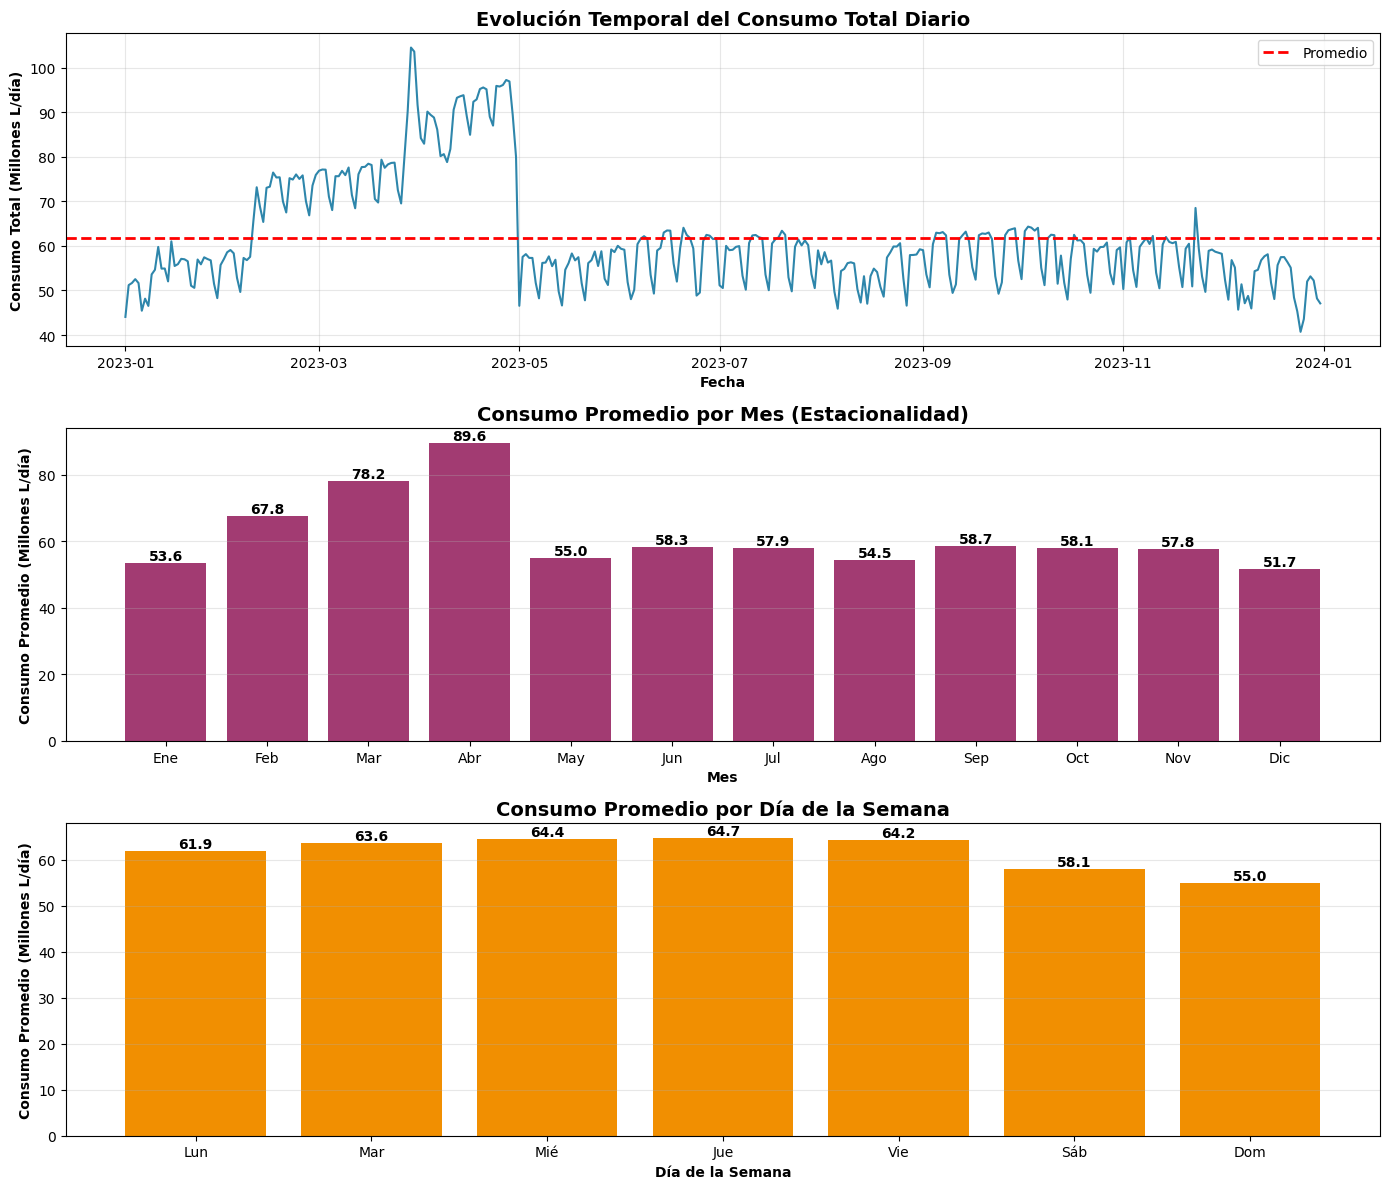


 PATRONES TEMPORALES:
   • Mes con mayor consumo: Abr (89.6 millones L/día)
   • Mes con menor consumo: Dic (51.7 millones L/día)
   • Variación estacional: 73.1%

   • Día con mayor consumo: Jue (64.7 millones L/día)
   • Día con menor consumo: Dom (55.0 millones L/día)
   • Variación semanal: 17.8%


In [16]:
# ============================================
# FASE 1.B: ANÁLISIS TEMPORAL
# ============================================

print("\n" + "="*60)
print("FASE 1.B: ANÁLISIS DE EVOLUCIÓN TEMPORAL DEL CONSUMO")
print("="*60)

# Agrupar por fecha
analisis_temporal = df_barcelona.groupby('FECHA').agg({
    'CONSUMO_L_DIA': 'sum',
    'NUM_CONTADORES': 'sum'
}).reset_index()

# Calcular consumo promedio por contador diario
analisis_temporal['CONSUMO_PROMEDIO_CONTADOR'] = (
    analisis_temporal['CONSUMO_L_DIA'] / analisis_temporal['NUM_CONTADORES']
)

# Información básica del período
print(f"\n PERÍODO ANALIZADO:")
print(f"   • Fecha inicio: {analisis_temporal['FECHA'].min()}")
print(f"   • Fecha fin: {analisis_temporal['FECHA'].max()}")
print(f"   • Días totales: {len(analisis_temporal)}")

# Estadísticas descriptivas
print(f"\n ESTADÍSTICAS DE CONSUMO DIARIO:")
print(f"   • Consumo promedio diario: {analisis_temporal['CONSUMO_L_DIA'].mean() / 1e6:.2f} millones L/día")
print(f"   • Consumo máximo: {analisis_temporal['CONSUMO_L_DIA'].max() / 1e6:.2f} millones L/día ({analisis_temporal[analisis_temporal['CONSUMO_L_DIA'] == analisis_temporal['CONSUMO_L_DIA'].max()]['FECHA'].values[0]})")
print(f"   • Consumo mínimo: {analisis_temporal['CONSUMO_L_DIA'].min() / 1e6:.2f} millones L/día ({analisis_temporal[analisis_temporal['CONSUMO_L_DIA'] == analisis_temporal['CONSUMO_L_DIA'].min()]['FECHA'].values[0]})")
print(f"   • Desviación estándar: {analisis_temporal['CONSUMO_L_DIA'].std() / 1e6:.2f} millones L/día")

# Agregar columnas de tiempo para análisis estacional
analisis_temporal['MES'] = analisis_temporal['FECHA'].dt.month
analisis_temporal['DIA_SEMANA'] = analisis_temporal['FECHA'].dt.dayofweek  # 0=Lunes, 6=Domingo
analisis_temporal['NOMBRE_MES'] = analisis_temporal['FECHA'].dt.strftime('%b')

# Análisis mensual
consumo_mensual = analisis_temporal.groupby('MES').agg({
    'CONSUMO_L_DIA': 'mean'
}).reset_index()

# Análisis semanal
consumo_semanal = analisis_temporal.groupby('DIA_SEMANA').agg({
    'CONSUMO_L_DIA': 'mean'
}).reset_index()
dias_semana = ['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom']
consumo_semanal['NOMBRE_DIA'] = consumo_semanal['DIA_SEMANA'].apply(lambda x: dias_semana[x])

# Visualización
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# Gráfico 1: Evolución diaria completa
ax1 = axes[0]
ax1.plot(analisis_temporal['FECHA'], analisis_temporal['CONSUMO_L_DIA'] / 1e6,
         color='#2E86AB', linewidth=1.5)
ax1.set_xlabel('Fecha', fontweight='bold')
ax1.set_ylabel('Consumo Total (Millones L/día)', fontweight='bold')
ax1.set_title('Evolución Temporal del Consumo Total Diario', fontweight='bold', fontsize=14)
ax1.grid(alpha=0.3)
ax1.axhline(analisis_temporal['CONSUMO_L_DIA'].mean() / 1e6,
            color='red', linestyle='--', linewidth=2, label='Promedio')
ax1.legend()

# Gráfico 2: Consumo promedio mensual
ax2 = axes[1]
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
meses_presentes = [meses[m-1] for m in consumo_mensual['MES']]
ax2.bar(meses_presentes, consumo_mensual['CONSUMO_L_DIA'] / 1e6, color='#A23B72')
ax2.set_xlabel('Mes', fontweight='bold')
ax2.set_ylabel('Consumo Promedio (Millones L/día)', fontweight='bold')
ax2.set_title('Consumo Promedio por Mes (Estacionalidad)', fontweight='bold', fontsize=14)
ax2.grid(axis='y', alpha=0.3)

# Añadir valores
for i, (mes, val) in enumerate(zip(meses_presentes, consumo_mensual['CONSUMO_L_DIA'] / 1e6)):
    ax2.text(i, val, f'{val:.1f}', ha='center', va='bottom', fontweight='bold')

# Gráfico 3: Consumo por día de la semana
ax3 = axes[2]
ax3.bar(consumo_semanal['NOMBRE_DIA'], consumo_semanal['CONSUMO_L_DIA'] / 1e6, color='#F18F01')
ax3.set_xlabel('Día de la Semana', fontweight='bold')
ax3.set_ylabel('Consumo Promedio (Millones L/día)', fontweight='bold')
ax3.set_title('Consumo Promedio por Día de la Semana', fontweight='bold', fontsize=14)
ax3.grid(axis='y', alpha=0.3)

# Añadir valores
for i, (dia, val) in enumerate(zip(consumo_semanal['NOMBRE_DIA'], consumo_semanal['CONSUMO_L_DIA'] / 1e6)):
    ax3.text(i, val, f'{val:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n PATRONES TEMPORALES:")
max_mes = consumo_mensual.loc[consumo_mensual['CONSUMO_L_DIA'].idxmax()]
min_mes = consumo_mensual.loc[consumo_mensual['CONSUMO_L_DIA'].idxmin()]
print(f"   • Mes con mayor consumo: {meses[int(max_mes['MES'])-1]} ({max_mes['CONSUMO_L_DIA']/1e6:.1f} millones L/día)")
print(f"   • Mes con menor consumo: {meses[int(min_mes['MES'])-1]} ({min_mes['CONSUMO_L_DIA']/1e6:.1f} millones L/día)")
print(f"   • Variación estacional: {((max_mes['CONSUMO_L_DIA'] - min_mes['CONSUMO_L_DIA']) / min_mes['CONSUMO_L_DIA'] * 100):.1f}%")

max_dia = consumo_semanal.loc[consumo_semanal['CONSUMO_L_DIA'].idxmax()]
min_dia = consumo_semanal.loc[consumo_semanal['CONSUMO_L_DIA'].idxmin()]
print(f"\n   • Día con mayor consumo: {max_dia['NOMBRE_DIA']} ({max_dia['CONSUMO_L_DIA']/1e6:.1f} millones L/día)")
print(f"   • Día con menor consumo: {min_dia['NOMBRE_DIA']} ({min_dia['CONSUMO_L_DIA']/1e6:.1f} millones L/día)")
print(f"   • Variación semanal: {((max_dia['CONSUMO_L_DIA'] - min_dia['CONSUMO_L_DIA']) / min_dia['CONSUMO_L_DIA'] * 100):.1f}%")


FASE 1.C: ANÁLISIS DE CONSUMO POR DISTRITO

 RESUMEN POR DISTRITO:
DISTRITO  CONSUMO_L_DIA  NUM_CONTADORES  CONSUMO_PROMEDIO_CONTADOR  PORCENTAJE_CONSUMO
       3     3835070778        29565051                 129.716359           17.033606
       2     3748485913        44841080                  83.594907           16.649036
       1     3740564372        15263625                 245.063959           16.613852
      10     2997323919        35630712                  84.121920           13.312723
       7     2149664899        23746141                  90.526915            9.547815
       5     1821544931        18258395                  99.764789            8.090458
       4     1560897230        13522905                 115.426177            6.932782
       6     1137837854        20322548                  55.988937            5.053748
       9      840451682        18211487                  46.149536            3.732897
       8      682890915        21632891                  31.56

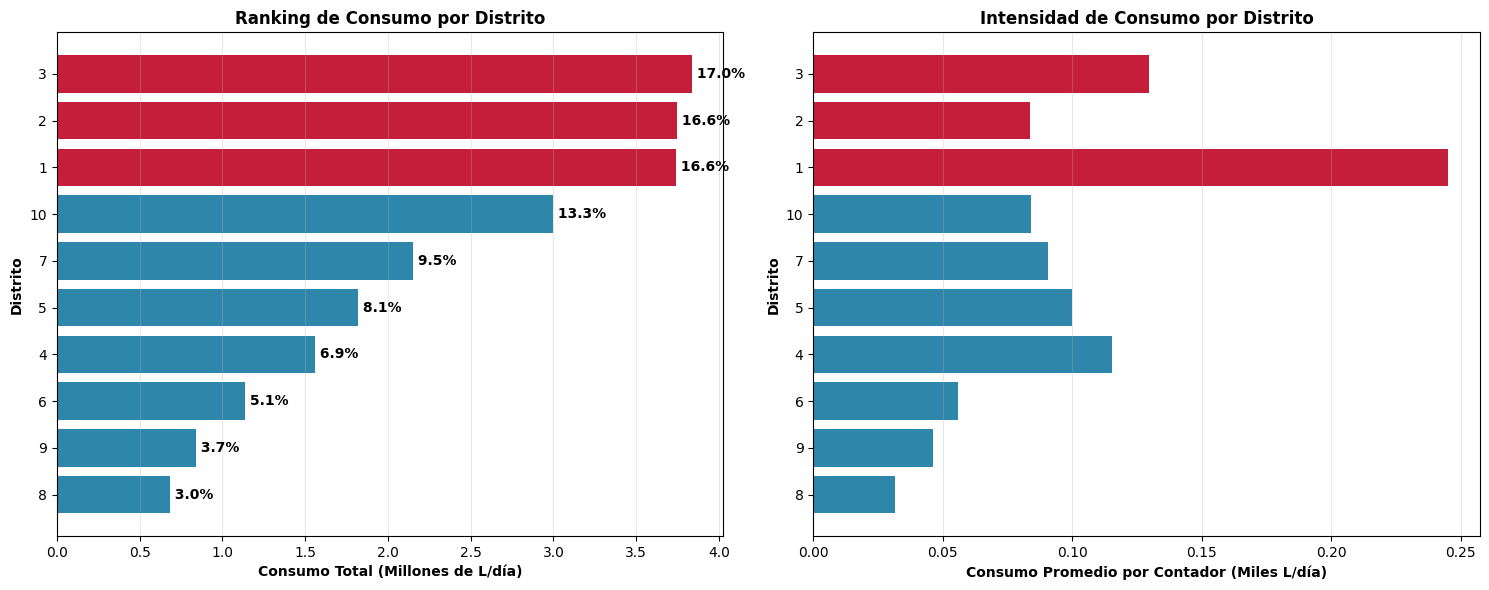


 OBSERVACIONES:
   • Top 3 distritos concentran: 50.3% del consumo
   • Distrito con mayor consumo: 3 (17.0%)
   • Distrito con mayor intensidad: 1


In [17]:
# ============================================
# FASE 1.C: ANÁLISIS POR DISTRITO
# ============================================

print("\n" + "="*60)
print("FASE 1.C: ANÁLISIS DE CONSUMO POR DISTRITO")
print("="*60)

# Agrupar por DISTRITO
analisis_distrito = df_barcelona.groupby('DISTRITO').agg({
    'CONSUMO_L_DIA': 'sum',
    'NUM_CONTADORES': 'sum'
}).reset_index()

# Calcular consumo promedio por contador
analisis_distrito['CONSUMO_PROMEDIO_CONTADOR'] = (
    analisis_distrito['CONSUMO_L_DIA'] / analisis_distrito['NUM_CONTADORES']
)

# Calcular porcentaje del total
analisis_distrito['PORCENTAJE_CONSUMO'] = (
    analisis_distrito['CONSUMO_L_DIA'] / analisis_distrito['CONSUMO_L_DIA'].sum() * 100
)

# Ordenar por consumo total
analisis_distrito = analisis_distrito.sort_values('CONSUMO_L_DIA', ascending=False)

print("\n RESUMEN POR DISTRITO:")
print(analisis_distrito.to_string(index=False))

# Visualización
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Ranking de consumo por distrito
colores = ['#C41E3A' if i < 3 else '#2E86AB' for i in range(len(analisis_distrito))]
ax1.barh(analisis_distrito['DISTRITO'], analisis_distrito['CONSUMO_L_DIA'] / 1e9, color=colores)
ax1.set_xlabel('Consumo Total (Millones de L/día)', fontweight='bold')
ax1.set_ylabel('Distrito', fontweight='bold')
ax1.set_title('Ranking de Consumo por Distrito', fontweight='bold')
ax1.invert_yaxis()
ax1.grid(axis='x', alpha=0.3)

# Añadir etiquetas de porcentaje
for i, (distrito, consumo, pct) in enumerate(zip(analisis_distrito['DISTRITO'],
                                                   analisis_distrito['CONSUMO_L_DIA'],
                                                   analisis_distrito['PORCENTAJE_CONSUMO'])):
    ax1.text(consumo / 1e9, i, f' {pct:.1f}%', va='center', fontweight='bold')

# Gráfico 2: Intensidad por distrito
ax2.barh(analisis_distrito['DISTRITO'], analisis_distrito['CONSUMO_PROMEDIO_CONTADOR'] / 1000, color=colores)
ax2.set_xlabel('Consumo Promedio por Contador (Miles L/día)', fontweight='bold')
ax2.set_ylabel('Distrito', fontweight='bold')
ax2.set_title('Intensidad de Consumo por Distrito', fontweight='bold')
ax2.invert_yaxis()
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n OBSERVACIONES:")
print(f"   • Top 3 distritos concentran: {analisis_distrito.head(3)['PORCENTAJE_CONSUMO'].sum():.1f}% del consumo")
print(f"   • Distrito con mayor consumo: {analisis_distrito.iloc[0]['DISTRITO']} ({analisis_distrito.iloc[0]['PORCENTAJE_CONSUMO']:.1f}%)")
print(f"   • Distrito con mayor intensidad: {analisis_distrito.sort_values('CONSUMO_PROMEDIO_CONTADOR', ascending=False).iloc[0]['DISTRITO']}")

In [30]:
# Cargar el dataset datos demograficos

df_demografico = pd.read_csv('/content/datos_demograficos.csv')
print("\n--- 3. Dados Demográficos ---")
df_demografico.info()
print("\nFilas de los Datos Demográficos:")
df_demografico.head(10)


--- 3. Dados Demográficos ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   number               10 non-null     int64  
 1   district             10 non-null     object 
 2   population_total     10 non-null     int64  
 3   men_est              10 non-null     int64  
 4   women_est            10 non-null     int64  
 5   avg_age_men          10 non-null     float64
 6   avg_age_women        10 non-null     float64
 7   área_ha              10 non-null     float64
 8   densidad_res_por_ha  10 non-null     float64
dtypes: float64(4), int64(4), object(1)
memory usage: 852.0+ bytes

Filas de los Datos Demográficos:


,number,district,population_total,men_est,women_est,avg_age_men,avg_age_women,área_ha,densidad_res_por_ha
0,1,Ciutat Vella,114359,51644,56666,43.83,49.53,436.8,261.81
1,2,Eixample,277308,129325,141898,46.18,42.41,746.4,371.53
2,3,Sants-Montjuïc,195817,90463,99259,45.33,41.66,2288.0,85.58
3,4,Les Corts,83983,39541,43386,47.73,43.67,601.1,139.72
4,5,Sarrià-Sant Gervasi,152990,71703,78674,45.04,41.04,1991.1,76.84
5,6,Gràcia,126996,59345,65115,45.58,41.86,418.6,303.40
6,7,Horta-Guinardó,182448,85276,93567,46.63,42.77,1194.7,152.71
7,8,Nou Barris,182039,85063,93333,45.72,41.84,800.0,227.55
8,9,Sant Andreu,157228,73346,80482,46.24,42.56,656.5,239.50
9,10,Sant Martí,252299,117733,129566,45.44,42.08,1052.4,239.75



FASE 1.D: ANÁLISIS DE CONSUMO PER CÁPITA (CON DEMOGRÁFICOS)

 DATOS DEMOGRÁFICOS:
DISTRITO     NOMBRE_DISTRITO  POBLACION  AREA_HA  DENSIDAD_POB
       1        Ciutat Vella     114359    436.8        261.81
       2            Eixample     277308    746.4        371.53
       3      Sants-Montjuïc     195817   2288.0         85.58
       4           Les Corts      83983    601.1        139.72
       5 Sarrià-Sant Gervasi     152990   1991.1         76.84
       6              Gràcia     126996    418.6        303.40
       7      Horta-Guinardó     182448   1194.7        152.71
       8          Nou Barris     182039    800.0        227.55
       9         Sant Andreu     157228    656.5        239.50
      10          Sant Martí     252299   1052.4        239.75

 RANKING DE CONSUMO PER CÁPITA:
DISTRITO     NOMBRE_DISTRITO  POBLACION  CONSUMO_L_DIA  CONSUMO_PER_CAPITA  CONTADORES_PER_CAPITA
       1        Ciutat Vella     114359     3740564372        32708.963632             133.47

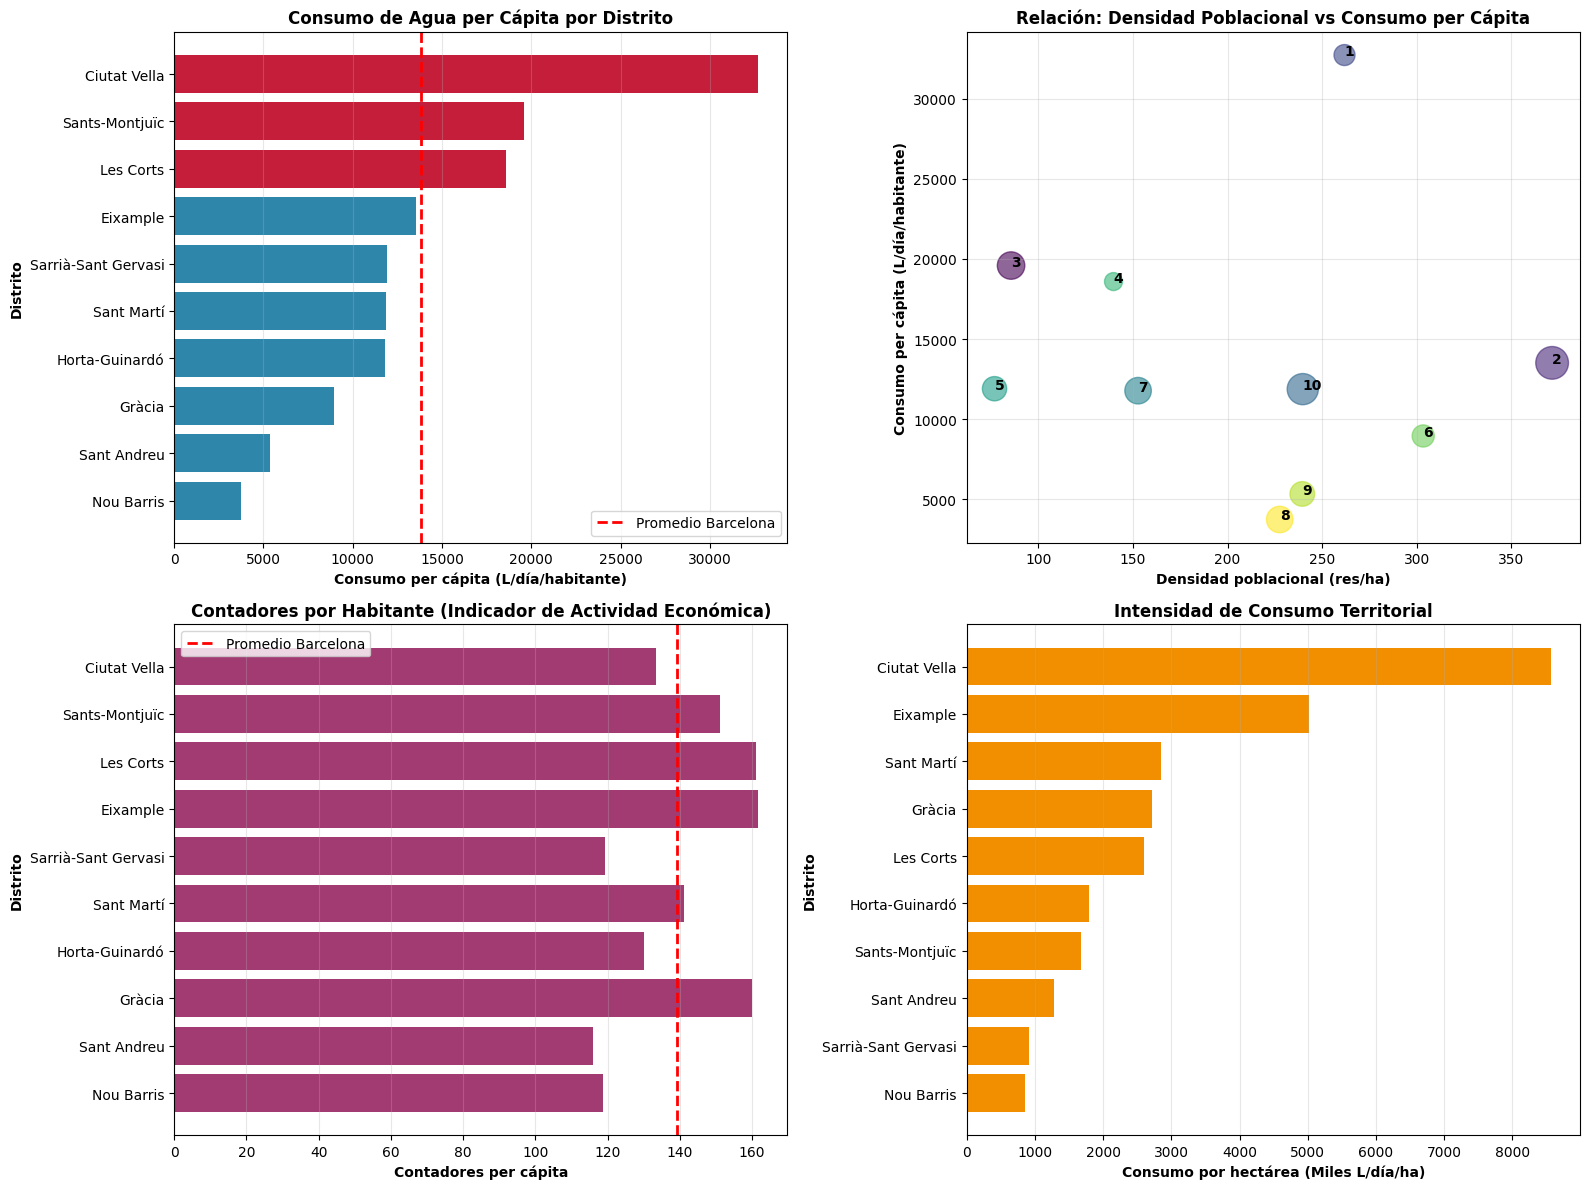


 OBSERVACIONES CON DEMOGRÁFICOS:
   • Distrito con mayor consumo per cápita: Ciutat Vella (32709.0 L/día/hab)
   • Promedio Barcelona: 13802.2 L/día/habitante
   • Rango: 3751.3 - 32709.0 L/día/hab

 CORRELACIÓN Densidad vs Consumo per cápita: -0.097 (p-value: 0.789)
   → Correlación débil


In [34]:
# ============================================
# FASE 1.D: INTEGRACIÓN CON DATOS DEMOGRÁFICOS
# ============================================

print("\n" + "="*60)
print("FASE 1.D: ANÁLISIS DE CONSUMO PER CÁPITA (CON DEMOGRÁFICOS)")
print("="*60)

# Limpieza de datos demográficos
df_demografico = df_demografico.rename(columns={
    'number': 'DISTRITO_NUM',
    'district': 'NOMBRE_DISTRITO',
    'population_total': 'POBLACION',
    'área_ha': 'AREA_HA',
    'densidad_res_por_ha': 'DENSIDAD_POB'
})

# POBLACION ya es int, no necesita conversión
# Crear columna DISTRITO como string para hacer merge
df_demografico['DISTRITO'] = df_demografico['DISTRITO_NUM'].astype(str)

print("\n DATOS DEMOGRÁFICOS:")
print(df_demografico[['DISTRITO', 'NOMBRE_DISTRITO', 'POBLACION', 'AREA_HA', 'DENSIDAD_POB']].to_string(index=False))

# Merge con análisis de distrito
analisis_completo = analisis_distrito.merge(
    df_demografico[['DISTRITO', 'NOMBRE_DISTRITO', 'POBLACION', 'AREA_HA', 'DENSIDAD_POB']],
    on='DISTRITO',
    how='left'
)

# Calcular nuevos indicadores
analisis_completo['CONSUMO_PER_CAPITA'] = (
    analisis_completo['CONSUMO_L_DIA'] / analisis_completo['POBLACION']
)

analisis_completo['CONTADORES_PER_CAPITA'] = (
    analisis_completo['NUM_CONTADORES'] / analisis_completo['POBLACION']
)

analisis_completo['CONSUMO_POR_HA'] = (
    analisis_completo['CONSUMO_L_DIA'] / analisis_completo['AREA_HA']
)

# Ordenar por consumo per cápita
analisis_completo_sorted = analisis_completo.sort_values('CONSUMO_PER_CAPITA', ascending=False)

print("\n RANKING DE CONSUMO PER CÁPITA:")
print(analisis_completo_sorted[['DISTRITO', 'NOMBRE_DISTRITO', 'POBLACION',
                                  'CONSUMO_L_DIA', 'CONSUMO_PER_CAPITA',
                                  'CONTADORES_PER_CAPITA']].to_string(index=False))

# Visualización
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Consumo per cápita por distrito
ax1 = axes[0, 0]
colores = ['#C41E3A' if c > analisis_completo['CONSUMO_PER_CAPITA'].mean() else '#2E86AB'
           for c in analisis_completo_sorted['CONSUMO_PER_CAPITA']]
ax1.barh(analisis_completo_sorted['NOMBRE_DISTRITO'],
         analisis_completo_sorted['CONSUMO_PER_CAPITA'], color=colores)
ax1.axvline(analisis_completo['CONSUMO_PER_CAPITA'].mean(),
            color='red', linestyle='--', linewidth=2, label='Promedio Barcelona')
ax1.set_xlabel('Consumo per cápita (L/día/habitante)', fontweight='bold')
ax1.set_ylabel('Distrito', fontweight='bold')
ax1.set_title('Consumo de Agua per Cápita por Distrito', fontweight='bold', fontsize=12)
ax1.invert_yaxis()
ax1.grid(axis='x', alpha=0.3)
ax1.legend()

# Gráfico 2: Correlación Densidad vs Consumo per cápita
ax2 = axes[0, 1]
scatter = ax2.scatter(analisis_completo['DENSIDAD_POB'],
                      analisis_completo['CONSUMO_PER_CAPITA'],
                      s=analisis_completo['POBLACION']/500,
                      alpha=0.6, c=range(len(analisis_completo)), cmap='viridis')
for i, row in analisis_completo.iterrows():
    ax2.annotate(row['DISTRITO'],
                 (row['DENSIDAD_POB'], row['CONSUMO_PER_CAPITA']),
                 fontsize=10, fontweight='bold')
ax2.set_xlabel('Densidad poblacional (res/ha)', fontweight='bold')
ax2.set_ylabel('Consumo per cápita (L/día/habitante)', fontweight='bold')
ax2.set_title('Relación: Densidad Poblacional vs Consumo per Cápita', fontweight='bold', fontsize=12)
ax2.grid(alpha=0.3)

# Gráfico 3: Contadores per cápita
ax3 = axes[1, 0]
ax3.barh(analisis_completo_sorted['NOMBRE_DISTRITO'],
         analisis_completo_sorted['CONTADORES_PER_CAPITA'], color='#A23B72')
ax3.axvline(analisis_completo['CONTADORES_PER_CAPITA'].mean(),
            color='red', linestyle='--', linewidth=2, label='Promedio Barcelona')
ax3.set_xlabel('Contadores per cápita', fontweight='bold')
ax3.set_ylabel('Distrito', fontweight='bold')
ax3.set_title('Contadores por Habitante (Indicador de Actividad Económica)', fontweight='bold', fontsize=12)
ax3.invert_yaxis()
ax3.grid(axis='x', alpha=0.3)
ax3.legend()

# Gráfico 4: Consumo por hectárea (intensidad territorial)
ax4 = axes[1, 1]
analisis_ha_sorted = analisis_completo.sort_values('CONSUMO_POR_HA', ascending=False)
ax4.barh(analisis_ha_sorted['NOMBRE_DISTRITO'],
         analisis_ha_sorted['CONSUMO_POR_HA']/1000, color='#F18F01')
ax4.set_xlabel('Consumo por hectárea (Miles L/día/ha)', fontweight='bold')
ax4.set_ylabel('Distrito', fontweight='bold')
ax4.set_title('Intensidad de Consumo Territorial', fontweight='bold', fontsize=12)
ax4.invert_yaxis()
ax4.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n OBSERVACIONES CON DEMOGRÁFICOS:")
top_percapita = analisis_completo_sorted.iloc[0]
print(f"   • Distrito con mayor consumo per cápita: {top_percapita['NOMBRE_DISTRITO']} ({top_percapita['CONSUMO_PER_CAPITA']:.1f} L/día/hab)")
print(f"   • Promedio Barcelona: {analisis_completo['CONSUMO_PER_CAPITA'].mean():.1f} L/día/habitante")
print(f"   • Rango: {analisis_completo['CONSUMO_PER_CAPITA'].min():.1f} - {analisis_completo['CONSUMO_PER_CAPITA'].max():.1f} L/día/hab")

# Correlación
from scipy.stats import pearsonr
corr_densidad, pval = pearsonr(analisis_completo['DENSIDAD_POB'], analisis_completo['CONSUMO_PER_CAPITA'])
print(f"\n CORRELACIÓN Densidad vs Consumo per cápita: {corr_densidad:.3f} (p-value: {pval:.3f})")
if abs(corr_densidad) > 0.5:
    print(f"   → {'Positiva' if corr_densidad > 0 else 'Negativa'} {'fuerte' if abs(corr_densidad) > 0.7 else 'moderada'}")
else:
    print(f"   → Correlación débil")